<a href="https://colab.research.google.com/github/TonyToeTap/FantasyFootball/blob/main/FF_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202021.csv').iloc[:, 1:]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         671 non-null    object 
 1   Tm             671 non-null    object 
 2   Pos            596 non-null    object 
 3   Age            671 non-null    int64  
 4   G              671 non-null    int64  
 5   GS             671 non-null    int64  
 6   Tgt            670 non-null    float64
 7   Rec            670 non-null    float64
 8   PassingYds     670 non-null    float64
 9   PassingTD      670 non-null    float64
 10  PassingAtt     670 non-null    float64
 11  RushingYds     670 non-null    float64
 12  RushingTD      670 non-null    float64
 13  RushingAtt     670 non-null    float64
 14  ReceivingYds   670 non-null    float64
 15  ReceivingTD    670 non-null    float64
 16  FantasyPoints  581 non-null    float64
 17  Int            670 non-null    float64
 18  Fumbles   

In [4]:
pd.set_option('chained_assignment', None) # I don't care about overriding the original df

In [5]:
# Accoring to the settings in my league

fantasy_scoring_weights = {
    'Rec': 0.5, # Half-PPR
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'FumblesLost': -2, #fumbles lost
    'RushingYds': 0.1,
    'RushingTD': 6,
    #'PassingYds': 0.04,
    #'PassingTD': 4,
    #'Int': -1
    }

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

rb_df = df[df['Pos'] == 'RB']

# create a FantasyPoints/G column
rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


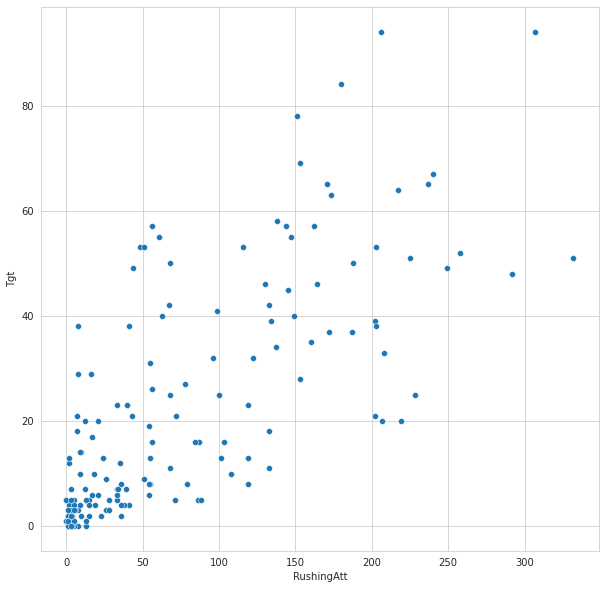

In [6]:
# seaborn settings
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))

sns.scatterplot(rb_df['RushingAtt'], rb_df['Tgt']);